# Part I: Data analysis, ML models & PyTorch

## Step 1: Data analysis & Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss, hinge_loss, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
palette_color = sns.color_palette('bright') 

In [3]:
# Dataset link: https://catalog.data.gov/dataset/electric-vehicle-population-data
df = pd.read_csv("Datasets/Electric_Vehicle_Population_Data.csv")

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 no

In [5]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  166795.000000  166800.000000   166800.000000  166800.000000   
mean    98173.713750    2020.341793       61.508993    1152.723171   
std      2442.584415       3.001465       93.271747    8661.081091   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000        0.000000       0.000000   
75%     98371.000000    2023.000000       84.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         166440.000000    1.668000e+05       1.667950e+05  
mean              29.178941    2.172420e+08       5.297709e+10  
std               14.853534    7.727458e+07       1.569754e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.00

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
columns_to_drop = ['VIN (1-10)', 'State', 'Postal Code', 'Base MSRP', 'Legislative District',
                   'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
df.drop(columns=columns_to_drop, inplace=True, axis=1)

new_names = {'Model Year': 'Model_Year', 'Electric Vehicle Type': 'EV_Type',
             'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility', 'Electric Range': 'Range'}
df.rename(columns=new_names, inplace=True)

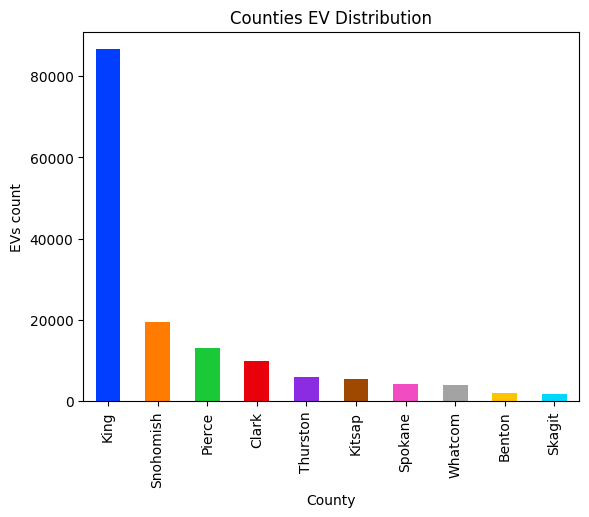

In [8]:
# Top ten counties with highest number of EVs
county_counts = df['County'].value_counts()
top_10_counties = county_counts.head(10)
top_10_counties.plot(kind='bar', color=palette_color)
plt.title('Counties EV Distribution')
plt.xlabel('County')
plt.ylabel('EVs count')
plt.xticks(rotation=90)
plt.show()

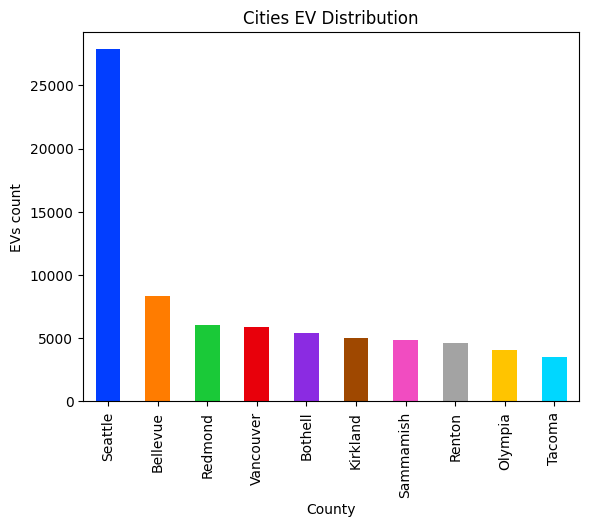

In [9]:
# Top ten Cities with highest number of EVs
cities_counts = df['City'].value_counts()
top_10_cities = cities_counts.head(10)
top_10_cities.plot(kind='bar', color=palette_color)
plt.title('Cities EV Distribution')
plt.xlabel('County')
plt.ylabel('EVs count')
plt.xticks(rotation=90)
plt.show()

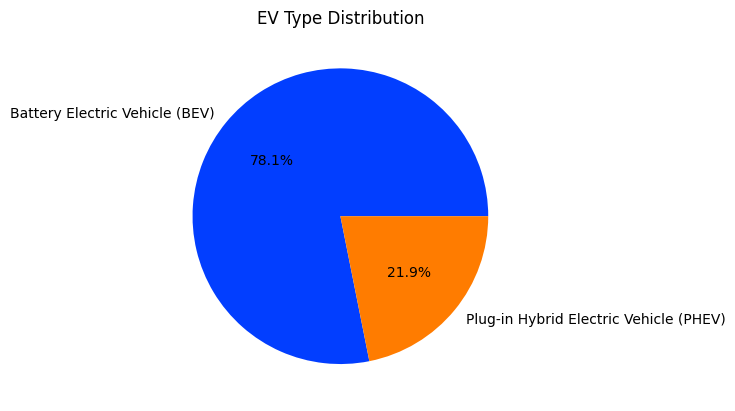

In [10]:
ev_type_counts = df['EV_Type'].value_counts()
ev_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=palette_color)
plt.title('EV Type Distribution')
plt.ylabel('')
plt.show()

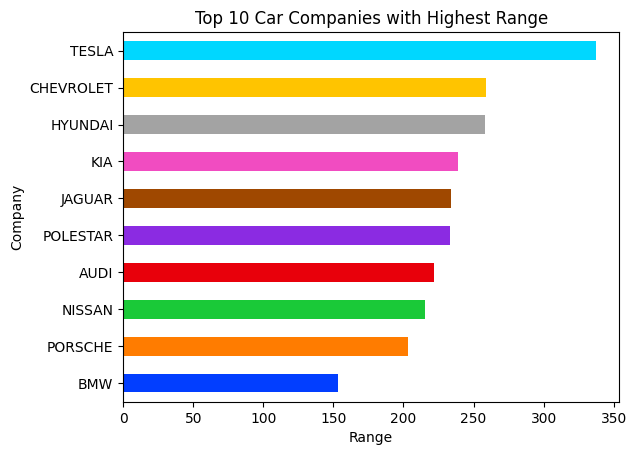

In [11]:
company_range = df.groupby('Make')['Range'].max()
top_10_companies = company_range.nlargest(10)

top_10_companies.sort_values().plot(kind='barh', color=palette_color)
plt.title('Top 10 Car Companies with Highest Range')
plt.xlabel('Range')
plt.ylabel('Company')
plt.show()

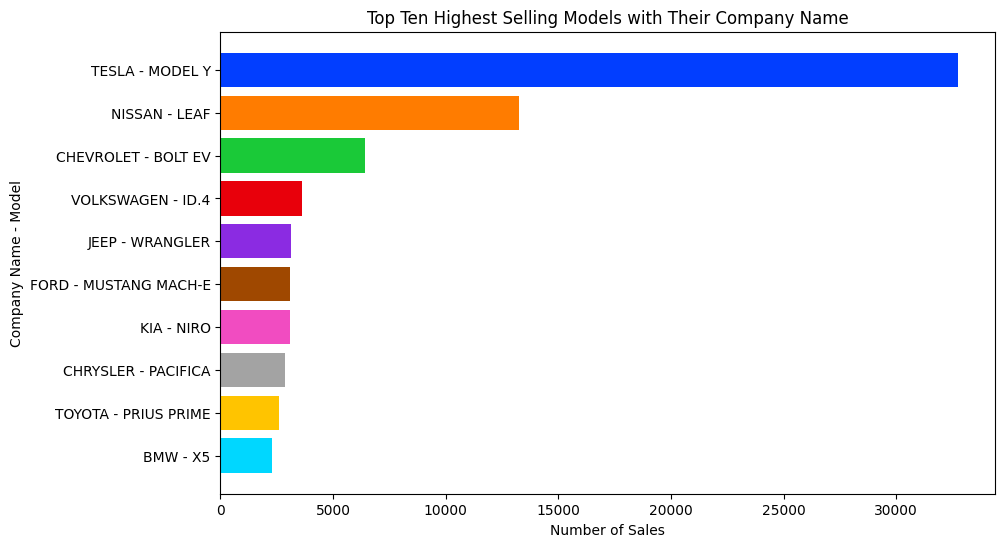

In [12]:
# Group by 'Car Company' and 'model' and find the total sales for each model within each company
model_counts = df.groupby(['Make', 'Model']).size().reset_index(name='count')

# Find the highest-selling model for each company
highest_selling_models = model_counts.loc[model_counts.groupby('Make')['count'].idxmax()]

# Sort the highest-selling models to find the top ten highest-selling models in descending order
top_10_models = highest_selling_models.sort_values(by='count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_models['Make'] + ' - ' + top_10_models['Model'], top_10_models['count'], color=palette_color)
plt.title('Top Ten Highest Selling Models with Their Company Name')
plt.xlabel('Number of Sales')
plt.ylabel('Company Name - Model')
plt.gca().invert_yaxis()
plt.show()

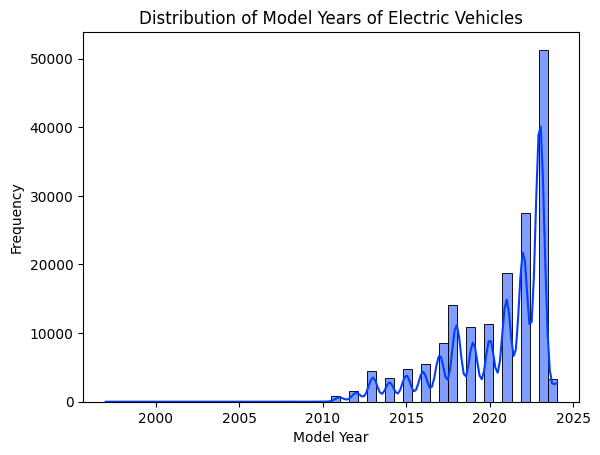

In [13]:
# Histogram of Model Year Distribution
sns.histplot(data=df, x='Model_Year', bins=50, kde=True, color=palette_color[0])
plt.title('Distribution of Model Years of Electric Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

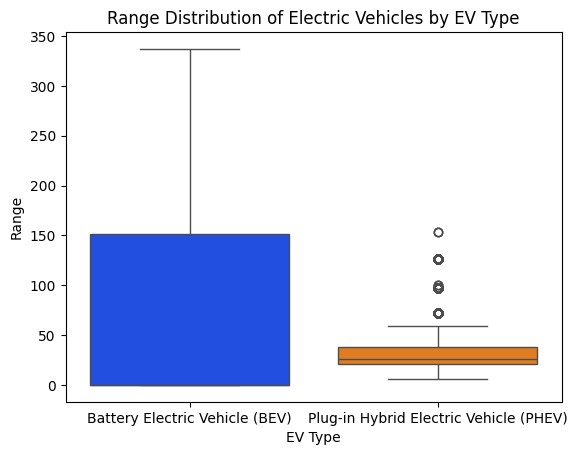

In [14]:
# Box Plot of Range by EV Type
sns.boxplot(data=df, x='EV_Type', y='Range', palette=palette_color)
plt.title('Range Distribution of Electric Vehicles by EV Type')
plt.xlabel('EV Type')
plt.ylabel('Range')
plt.show()

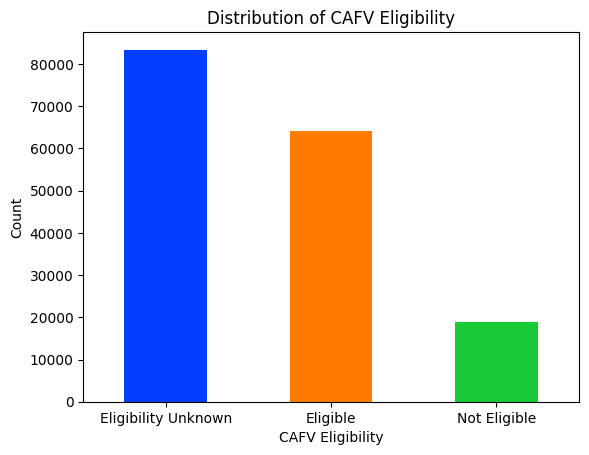

In [15]:
custom_labels = ['Eligibility Unknown', 'Eligible', 'Not Eligible']

CAFV_Eligibility_counts = df['CAFV_Eligibility'].value_counts()
CAFV_Eligibility_counts.plot(kind='bar', color=palette_color)
plt.title('Distribution of CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.xticks(range(len(custom_labels)), custom_labels, rotation=0)
plt.show()

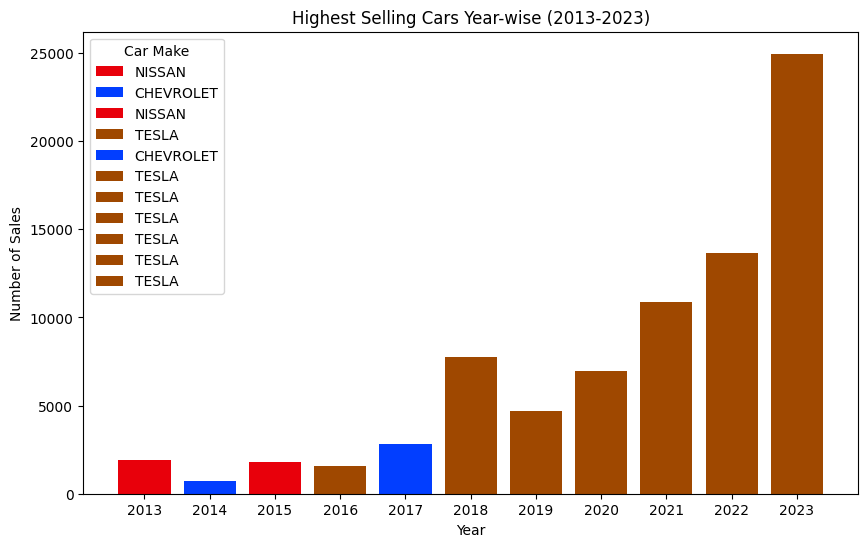

In [16]:
# Filter data for years from 2013 to 2023
df_filtered = df[(df['Model_Year'] >= 2013) & (df['Model_Year'] <= 2023)]

sales_count = df_filtered.groupby(['Model_Year', 'Make']).size().reset_index(name='count')

unique_makes = sales_count['Make'].unique()
palette_color = sns.color_palette("bright", len(unique_makes))

color_dict = {make: color for make, color in zip(unique_makes, palette_color)}

# Get the highest-selling car for each year
highest_selling_cars = sales_count.loc[sales_count.groupby('Model_Year')['count'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
for index, row in highest_selling_cars.iterrows():
    plt.bar(row['Model_Year'], row['count'], color=color_dict[row['Make']], label=row['Make'])

plt.title('Highest Selling Cars Year-wise (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(title='Car Make')
plt.xticks(highest_selling_cars['Model_Year'])
plt.show()

In [17]:
# One-Hot Encoding
df_encoded = pd.get_dummies(
    df, columns=['CAFV_Eligibility', 'EV_Type'], prefix=['CAFV', 'EV'])

columns_to_convert = ['CAFV_Clean Alternative Fuel Vehicle Eligible', 'CAFV_Eligibility unknown as battery range has not been researched',
                      'CAFV_Not eligible due to low battery range', 'EV_Battery Electric Vehicle (BEV)', 'EV_Plug-in Hybrid Electric Vehicle (PHEV)']

# Convert boolean values to integers (0 and 1)
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)


In [18]:
# Define custom column names for CAFV_Eligibility
custom_column_names_cafv = {
    'CAFV_Clean Alternative Fuel Vehicle Eligible': 'CAFV_Eligible',
    'CAFV_Not eligible due to low battery range': 'CAFV_Not_Eligible',
    'CAFV_Eligibility unknown as battery range has not been researched': 'CAFV_Eligibility_Unknown'
}

# Define custom column names for EV_Type
custom_column_names_ev = {
    'EV_Battery Electric Vehicle (BEV)': 'Battery_Electric_Vehicle(BEV)',
    'EV_Plug-in Hybrid Electric Vehicle (PHEV)': 'Plug-in_Hybrid_Electric_Vehicle(PHEV)'
}

# Rename the columns
df_encoded = df_encoded.rename(
    columns={**custom_column_names_cafv, **custom_column_names_ev})

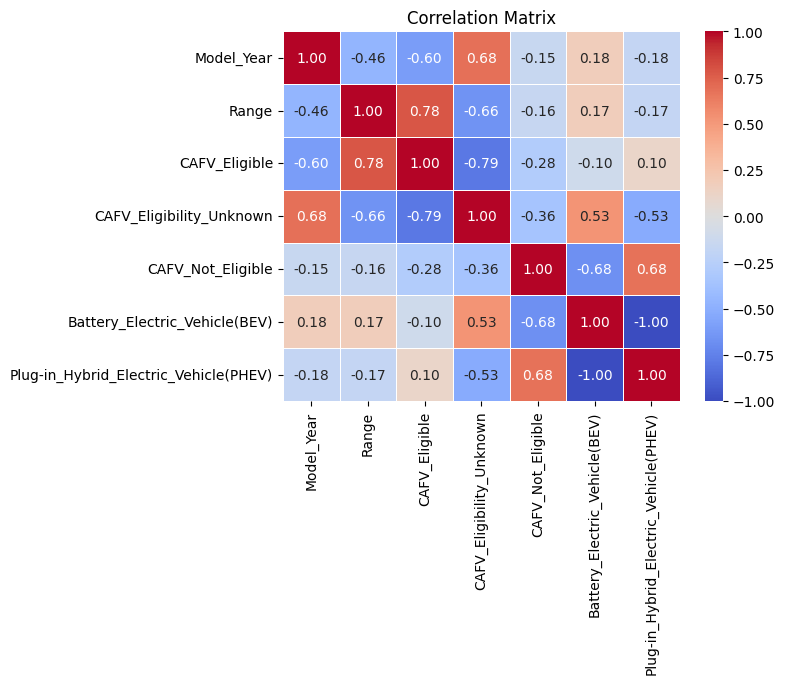

In [19]:
correlation_matrix = df_encoded[['Model_Year', 'Range', 'CAFV_Eligible', 'CAFV_Eligibility_Unknown',
                                 'CAFV_Not_Eligible', 'Battery_Electric_Vehicle(BEV)', 'Plug-in_Hybrid_Electric_Vehicle(PHEV)']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
df_encoded.head()

,County,City,Model_Year,Make,Model,Range,CAFV_Eligible,CAFV_Eligibility_Unknown,CAFV_Not_Eligible,Battery_Electric_Vehicle(BEV),Plug-in_Hybrid_Electric_Vehicle(PHEV)
0,Yakima,Yakima,2014,FIAT,500,87,1,0,0,1,0
1,Thurston,Olympia,2017,TESLA,MODEL X,200,1,0,0,1,0
2,King,Renton,2023,BMW,330E,20,0,0,1,0,1
3,Snohomish,Bothell,2023,RIVIAN,R1S,0,0,1,0,1,0
4,King,Kent,2020,TESLA,MODEL 3,322,1,0,0,1,0


In [21]:
X = df_encoded[['Model_Year', 'Range', 'Battery_Electric_Vehicle(BEV)', 'Plug-in_Hybrid_Electric_Vehicle(PHEV)']]
y = df_encoded['CAFV_Eligible']

# Split the dataset into training and temporary sets (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into testing and validation sets (50% testing, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (133148, 4)
Shape of y_train: (133148,)
Shape of X_test: (16643, 4)
Shape of y_test: (16643,)
Shape of X_val: (16644, 4)
Shape of y_val: (16644,)


## Step 2: ML Models

In [23]:
# Initialize and train classifiers
lrModel = LogisticRegression()
rfModel = RandomForestClassifier()
svmModel = SVC()

lrModel.fit(X_train, y_train)
rfModel.fit(X_train, y_train)
svmModel.fit(X_train, y_train)

# Predict on the validation set
lr_pred_val = lrModel.predict(X_val)
rf_pred_val = rfModel.predict(X_val)
svm_pred_val = svmModel.predict(X_val)

# Predict on the testing set
lr_pred_test = lrModel.predict(X_test)
rf_pred_test = rfModel.predict(X_test)
svm_pred_test = svmModel.predict(X_test)

In [24]:
# Evaluate Loss on validation set
lr_loss_val = log_loss(y_val, lr_pred_val)
svm_loss_val = hinge_loss(y_val, svm_pred_val)

# Generate classification report for Random Forest
rf_classification_report_val = classification_report(y_val, rf_pred_val)

# Evaluate accuracy on validation set
lr_accuracy_val = accuracy_score(y_val, lr_pred_val)
rf_accuracy_val = accuracy_score(y_val, rf_pred_val)
svm_accuracy_val = accuracy_score(y_val, svm_pred_val)

print("--- Validation Set Loss ---")
print("Logistic Regression Loss on Validation Set:", lr_loss_val)
print("Support Vector Machine(SVM) Loss on Validation Set:", svm_loss_val)

print("--- Random Forest Classification Report on Validation Set---")
print(rf_classification_report_val)

print("--- Validation Set ---")
print("Logistic Regression Accuracy on Validation Set:", lr_accuracy_val)
print("Random Forest Accuracy on Validation Set:", rf_accuracy_val)
print("Support Vector Machine(SVM) Accuracy on Validation Set:", svm_accuracy_val)

--- Validation Set Loss ---
Logistic Regression Loss on Validation Set: 2.2204460492503136e-16
Support Vector Machine(SVM) Loss on Validation Set: 0.6242489786109109
--- Random Forest Classification Report on Validation Set---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10231
           1       1.00      1.00      1.00      6413

    accuracy                           1.00     16644
   macro avg       1.00      1.00      1.00     16644
weighted avg       1.00      1.00      1.00     16644

--- Validation Set ---
Logistic Regression Accuracy on Validation Set: 1.0
Random Forest Accuracy on Validation Set: 1.0
Support Vector Machine(SVM) Accuracy on Validation Set: 0.9904470079307859


In [25]:
# Evaluate Loss on testing set
lr_loss_test = log_loss(y_test, lr_pred_test)
svm_loss_test = hinge_loss(y_test, svm_pred_test)

# Generate classification report for Random Forest
rf_classification_report_test = classification_report(y_test, rf_pred_test)

# Evaluate accuracy on testing set
lr_accuracy_test = accuracy_score(y_test, lr_pred_test)
rf_accuracy_test = accuracy_score(y_test, rf_pred_test)
svm_accuracy_test = accuracy_score(y_test, svm_pred_test)

print("\n--- Testing Set Loss ---")
print("Logistic Regression Loss on Testing Set:", lr_loss_test)
print("Support Vector Machine(SVM) Loss on Testing Set:", svm_loss_test)

print("--- Random Forest Classification Report on Testing Set---")
print(rf_classification_report_test)

print("\n--- Testing Set ---")
print("Logistic Regression Accuracy on Testing Set:", lr_accuracy_test)
print("Random Forest Accuracy on Testing Set:", rf_accuracy_test)
print("Support Vector Machine(SVM) Accuracy on Testing Set:", svm_accuracy_test)


--- Testing Set Loss ---
Logistic Regression Loss on Testing Set: 2.2204460492503136e-16
Support Vector Machine(SVM) Loss on Testing Set: 0.6269903262632939
--- Random Forest Classification Report on Testing Set---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10307
           1       1.00      1.00      1.00      6336

    accuracy                           1.00     16643
   macro avg       1.00      1.00      1.00     16643
weighted avg       1.00      1.00      1.00     16643


--- Testing Set ---
Logistic Regression Accuracy on Testing Set: 1.0
Random Forest Accuracy on Testing Set: 1.0
Support Vector Machine(SVM) Accuracy on Testing Set: 0.9923090788920267


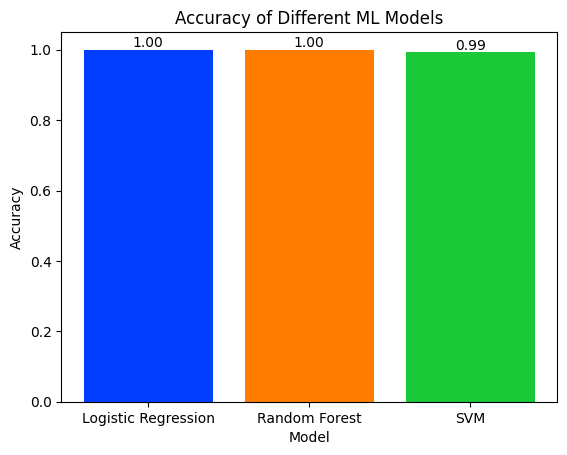

In [26]:
import matplotlib.pyplot as plt

# Plotting
models = ['Logistic Regression', 'Random Forest', 'SVM']
# Use accuracies for classification, RMSEs for regression
accuracies = [lr_accuracy_test, rf_accuracy_test, svm_accuracy_test]

plt.bar(models, accuracies, color=palette_color)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')

# Annotate bars with their accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


## Step 3: Intro to PyTorch and Building a NN 

# Tensors

In [27]:
import torch
import numpy as np

## Tensor Initialization

### Directly from data

In [28]:
data = [[5, 6], [7, 8]]
x_data = torch.tensor(data)

In [29]:
x_data

tensor([[5, 6],
        [7, 8]])

### From a NumPy array

In [30]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [31]:
x_np

tensor([[5, 6],
        [7, 8]])

### From another tensor:

In [32]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7794, 0.9103],
        [0.9597, 0.4938]]) 



### With random or constant values:

In [33]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3321, 0.5135, 0.0229],
        [0.5973, 0.4378, 0.9986]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

In [34]:
tensor = torch.rand(4, 5)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

In [35]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

### Standard numpy-like indexing and slicing:

In [36]:
tensor = torch.ones(5, 5)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]])


### Joining tensors

In [37]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.]])


### Multiplying tensors

In [38]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]])


### In-place operations

In [39]:
print(tensor, "\n")
tensor.add_(7)
print(tensor)

tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]]) 

tensor([[8., 7., 8., 8., 8.],
        [8., 7., 8., 8., 8.],
        [8., 7., 8., 8., 8.],
        [8., 7., 8., 8., 8.],
        [8., 7., 8., 8., 8.]])


## Bridge with NumPy

### Tensor to NumPy array

In [40]:
t = torch.ones(8)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1. 1. 1. 1.]


In [41]:
t.add_(3)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([4., 4., 4., 4., 4., 4., 4., 4.])
n: [4. 4. 4. 4. 4. 4. 4. 4.]


### NumPy array to Tensor

In [42]:
n = np.ones(5)
t = torch.from_numpy(n)

In [43]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# INTRODUCTION TO TORCH.AUTOGRAD

## Usage in PyTorch

In [44]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [45]:
prediction = model(data) # forward pass

In [46]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [47]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [48]:
optim.step() #gradient descent

## Differentiation in Autograd

In [49]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [50]:
Q = 3*a**3 - b**2

In [51]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [52]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## Computational Graph

### Exclusion from the DAG

In [53]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [54]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [55]:
model.fc = nn.Linear(512, 10)

In [56]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# NEURAL NETWORKS

## Define the network

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [58]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [59]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0458, -0.0320,  0.0782,  0.0795, -0.0361, -0.0168, -0.0356,  0.0100,
          0.0414,  0.0059]], grad_fn=<AddmmBackward0>)


In [60]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## Loss Function

In [61]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8515, grad_fn=<MseLossBackward0>)


In [62]:
input

tensor([[[[ 0.8528, -0.0477,  1.1119,  ..., -0.7287, -0.9937,  0.2638],
          [-1.6635,  0.8105,  0.0509,  ...,  0.0392, -1.5715,  0.4189],
          [ 0.1666,  0.4744,  0.0506,  ..., -0.0974, -0.0147, -0.5530],
          ...,
          [-1.3533,  0.1531,  0.1365,  ...,  0.7941,  0.6977, -1.2452],
          [ 0.0028, -0.0942, -0.9078,  ..., -1.3576,  0.8869,  0.5266],
          [-1.9158, -0.9009, -1.5897,  ...,  0.4401,  0.9982,  0.7572]]]])

In [63]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [64]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0030,  0.0031, -0.0032,  0.0098, -0.0087, -0.0070])


## Update the weights

In [65]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [66]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# TRAINING A CLASSIFIER

### Load and normalize CIFAR10

In [67]:
import torch
import torchvision
import torchvision.transforms as transforms

In [68]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


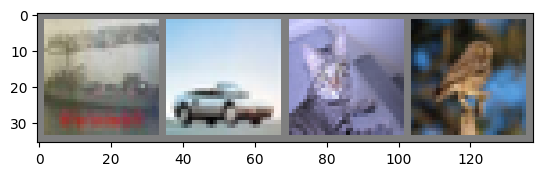

ship  car   cat   bird 


In [69]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define a Convolutional Neural Network

In [70]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [71]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [72]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.215
[1,  4000] loss: 1.899
[1,  6000] loss: 1.693
[1,  8000] loss: 1.586
[1, 10000] loss: 1.520
[1, 12000] loss: 1.476
[2,  2000] loss: 1.398
[2,  4000] loss: 1.385
[2,  6000] loss: 1.361
[2,  8000] loss: 1.333
[2, 10000] loss: 1.312
[2, 12000] loss: 1.300
Finished Training


In [73]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

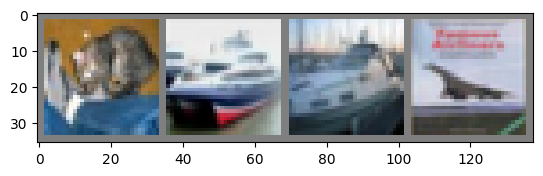

GroundTruth:  cat   ship  ship  plane


In [74]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [75]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [76]:
outputs = net(images)

In [77]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(4)))

Predicted:  cat   car   car   plane


In [78]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [79]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 73.5 %
Accuracy for class: car   is 84.3 %
Accuracy for class: bird  is 38.2 %
Accuracy for class: cat   is 31.8 %
Accuracy for class: deer  is 35.0 %
Accuracy for class: dog   is 48.8 %
Accuracy for class: frog  is 62.8 %
Accuracy for class: horse is 49.3 %
Accuracy for class: ship  is 62.0 %
Accuracy for class: truck is 55.5 %


# Changing Hyperparameters

## Hyperparameter-1 Information

1. Number of layers = 1 Convolutional Layer
1. Number of nodes per layer = 2 Fully Connected Layers. Number of nodes in FC1=512, FC2=10
1. Activation function = LeakyRELU
1. Optimizer = SGD with momentum
1. Learning rate = 1e-4
1. Accuracy on training set = 52%
1. Accuracy on validation set = 50%

[1,  2000] loss: 2.186
[1,  4000] loss: 1.963
[1,  6000] loss: 1.854
[1,  8000] loss: 1.760
[1, 10000] loss: 1.696
[1, 12000] loss: 1.649
[2,  2000] loss: 1.545
[2,  4000] loss: 1.523
[2,  6000] loss: 1.490
[2,  8000] loss: 1.434
[2, 10000] loss: 1.399
[2, 12000] loss: 1.402
Finished Training


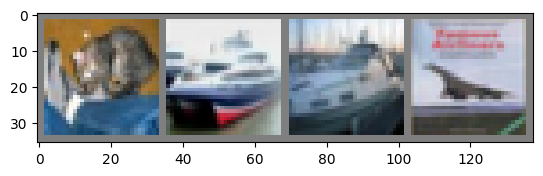

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  ship  ship 
Accuracy of the network on the 50000 training images: 52 %
Accuracy of the network on the 10000 validation images: 50 %


In [80]:
# Defining Convolutional Network
class HyperNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x


hyperNet1 = HyperNet1()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(hyperNet1.parameters(), lr=0.0001, momentum=0.9)

# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = hyperNet1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


# Testing network in test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = hyperNet1(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

correctTrain, totalTrain = 0, 0
correctVal, totalVal = 0, 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalTrain += labels.size(0)
        correctTrain += (predicted == labels).sum().item()

    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalVal += labels.size(0)
        correctVal += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 50000 training images: {100 * correctTrain // totalTrain} %')
print(f'Accuracy of the network on the 10000 validation images: {100 * correctVal // totalVal} %')

## Hyperparameter-2 Information

1. Number of layers = 2 Convolutional Layer
1. Number of nodes per layer = 3 Fully Connected Layers. Number of nodes in FC1=360, FC2=120, FC3=10
1. Activation function = sigmoid
1. Optimizer = SGD with momentum
1. Learning rate = 1e-4
1. Accuracy on training set = 10%
1. Accuracy on validation set = 10%

[1,  2000] loss: 2.308
[1,  4000] loss: 2.304
[1,  6000] loss: 2.305
[1,  8000] loss: 2.304
[1, 10000] loss: 2.305
[1, 12000] loss: 2.304
[2,  2000] loss: 2.305
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.305
[2, 12000] loss: 2.304
Finished Training


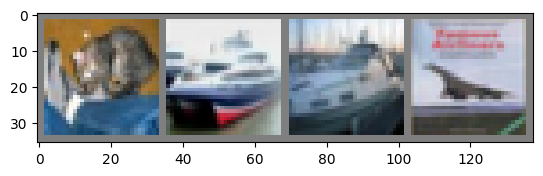

GroundTruth:  cat   ship  ship  plane
Predicted:  bird  bird  bird  bird 
Accuracy of the network on the 50000 training images: 10 %
Accuracy of the network on the 10000 validation images: 10 %


In [81]:
# Defining Convolutional Network
class HyperNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 5 * 5, 360)
        self.fc2 = nn.Linear(360, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


hyperNet2 = HyperNet2()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(hyperNet2.parameters(), lr=0.0001, momentum=0.9)

# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = hyperNet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


# Testing network in test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = hyperNet2(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

correctTrain, totalTrain = 0, 0
correctVal, totalVal = 0, 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalTrain += labels.size(0)
        correctTrain += (predicted == labels).sum().item()

    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalVal += labels.size(0)
        correctVal += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 50000 training images: {100 * correctTrain // totalTrain} %')
print(f'Accuracy of the network on the 10000 validation images: {100 * correctVal // totalVal} %')

## Hyperparameter-3 Information

1. Number of layers = 2 Convolutional Layer
1. Number of nodes per layer = 3 Fully Connected Layers. Number of nodes in FC1=360, FC2=120, FC3=10
1. Activation function = RELU
1. Optimizer = Adam
1. Learning rate = 1e-1
1. Accuracy on training set = 10%
1. Accuracy on validation set = 10%

[1,  2000] loss: 19.675
[1,  4000] loss: 2.339
[1,  6000] loss: 2.339
[1,  8000] loss: 2.342
[1, 10000] loss: 2.345
[1, 12000] loss: 2.340
[2,  2000] loss: 2.340
[2,  4000] loss: 2.340
[2,  6000] loss: 2.338
[2,  8000] loss: 2.341
[2, 10000] loss: 2.341
[2, 12000] loss: 2.338
Finished Training


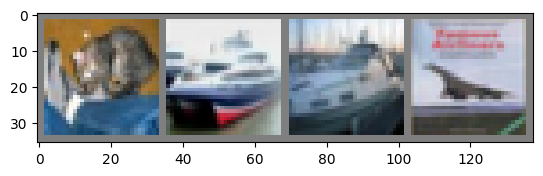

GroundTruth:  cat   ship  ship  plane
Predicted:  dog   dog   dog   dog  
Accuracy of the network on the 50000 training images: 10 %
Accuracy of the network on the 10000 validation images: 10 %


In [82]:
# Defining Convolutional Network
class HyperNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 5 * 5, 360)
        self.fc2 = nn.Linear(360, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


hyperNet3 = HyperNet3()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hyperNet3.parameters(), lr=0.1)

# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = hyperNet3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


# Testing network in test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = hyperNet3(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

correctTrain, totalTrain = 0, 0
correctVal, totalVal = 0, 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalTrain += labels.size(0)
        correctTrain += (predicted == labels).sum().item()

    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = hyperNet3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        totalVal += labels.size(0)
        correctVal += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 50000 training images: {100 * correctTrain // totalTrain} %')
print(f'Accuracy of the network on the 10000 validation images: {100 * correctVal // totalVal} %')

### NN to solve the problem defined in Part I

In [83]:
# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [84]:
# Create DataLoader for training, validation, and testing sets
train_dataset = TensorDataset(torch.tensor(X_train_tensor), torch.tensor(y_train_tensor))
val_dataset = TensorDataset(torch.tensor(X_val_tensor), torch.tensor(y_val_tensor))
test_dataset = TensorDataset(torch.tensor(X_test_tensor), torch.tensor(y_test_tensor))

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [85]:
# Define the neural network architecture
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [86]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 8
output_size = 3  # Number of classes at output layer
model = NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [87]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model on the validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = correct / total
print(f"Validation Accuracy: {val_accuracy:.2%}")

Epoch 1/10, Loss: 0.3347
Epoch 2/10, Loss: 0.0286
Epoch 3/10, Loss: 0.0132
Epoch 4/10, Loss: 0.0074
Epoch 5/10, Loss: 0.0058
Epoch 6/10, Loss: 0.0050
Epoch 7/10, Loss: 0.0056
Epoch 8/10, Loss: 0.0044
Epoch 9/10, Loss: 0.0059
Epoch 10/10, Loss: 0.0047
Validation Accuracy: 99.79%


In [88]:
# Test the model on the testing set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_NN_accuracy = correct / total
print(f"Test Accuracy: {test_NN_accuracy:.2%}")

Test Accuracy: 99.78%


In [91]:
# Save model with weights
torch.save(model.state_dict(), 'ngupta22_assignment0_part_1.pt')

### Compare results of various models

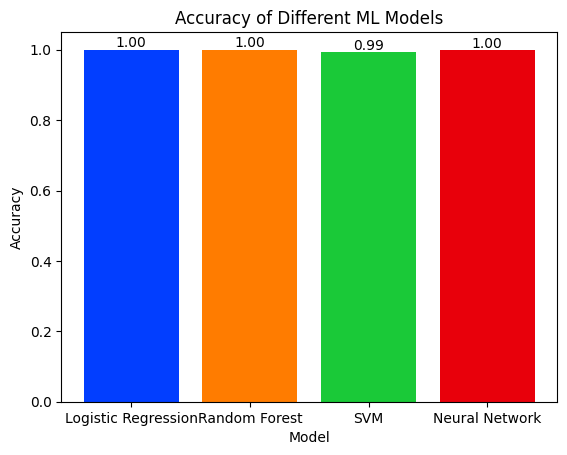

In [90]:
import matplotlib.pyplot as plt

# Plotting
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network']
# Use accuracies for classification, RMSEs for regression
accuracies = [lr_accuracy_test, rf_accuracy_test, svm_accuracy_test, test_NN_accuracy]

plt.bar(models, accuracies, color=palette_color)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')

# Annotate bars with their accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

# References

1. https://pandas.pydata.org/docs/
1. https://numpy.org/doc/
1. https://matplotlib.org/stable/index.html
1. https://scikit-learn.org/stable/
1. https://seaborn.pydata.org/
1. https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
1. https://optuna.org/
1. https://numpy.org/doc/stable/
1. Part I - Step 3 is based on CSE 574 Machine Learning Quiz 5 submission by Nikhil Gupta